# Project 1

## Step 1: Open the `sat_scores.csv` file. Investigate the data, and answer the questions below.


##### 1. What does the data describe?

    #This data, taken from the College Board, gives the mean SAT math and verbal scores, and the participation rate for each state and the District of Columbia for the year 2001.

##### 2. Does the data look complete? Are there any obvious issues with the observations?

#There is a row with All that could conflict with our data, depending on what we are wanting to query.  The row of labels will also conflict and will need to be removed.  We will potentially have to account for repeated values within the dataset, depending on what statistics we are looking for.

##### 3. Create a data dictionary for the dataset.

In [3]:
import csv
import numpy as np
from matplotlib import pyplot as plt
import scipy
reader = csv.reader(open('/Users/Lappy9000/Dropbox/Dropbox/GA/GitHub/DSI_SM_01/projects/01-projects-weekly/project-01/assets/sat_scores.csv'))

result = {}
for row in reader:
    key = row[0]
    if key in result:
        pass
    result[key] = row[1:]
print result

{'WA': ['53', '527', '527'], 'DE': ['67', '501', '499'], 'DC': ['56', '482', '474'], 'WI': ['6', '584', '596'], 'WV': ['18', '527', '512'], 'State': ['Rate', 'Verbal', 'Math'], 'HI': ['52', '485', '515'], 'FL': ['54', '498', '499'], 'WY': ['11', '547', '545'], 'NH': ['72', '520', '516'], 'NJ': ['81', '499', '513'], 'NM': ['13', '551', '542'], 'TX': ['53', '493', '499'], 'LA': ['7', '564', '562'], 'NB': ['8', '562', '568'], 'NC': ['65', '493', '499'], 'ND': ['4', '592', '599'], 'TN': ['13', '562', '553'], 'NY': ['77', '495', '505'], 'PA': ['71', '500', '499'], 'RI': ['71', '501', '499'], 'NV': ['33', '509', '515'], 'VA': ['68', '510', '501'], 'CO': ['31', '539', '542'], 'AK': ['51', '514', '510'], 'AL': ['9', '559', '554'], 'AR': ['6', '562', '550'], 'VT': ['69', '511', '506'], 'IL': ['12', '576', '589'], 'GA': ['63', '491', '489'], 'IN': ['60', '499', '501'], 'IA': ['5', '593', '603'], 'OK': ['8', '567', '561'], 'AZ': ['34', '523', '525'], 'CA': ['51', '498', '517'], 'ID': ['17', '543'

## Step 2: Load the data.

##### 4. Load the data into a list of lists

In [4]:
#do not use pandas - lesson 3.2 with open
data = []
with open('/Users/Lappy9000/Dropbox/Dropbox/GA/GitHub/DSI_SM_01/projects/01-projects-weekly/project-01/assets/sat_scores.csv', 'rU') as f:
    reader = csv.reader(f)
    for row in reader:
        data.append(row)
f.close()

##### 5. Print the data

In [5]:
print data

[['State', 'Rate', 'Verbal', 'Math'], ['CT', '82', '509', '510'], ['NJ', '81', '499', '513'], ['MA', '79', '511', '515'], ['NY', '77', '495', '505'], ['NH', '72', '520', '516'], ['RI', '71', '501', '499'], ['PA', '71', '500', '499'], ['VT', '69', '511', '506'], ['ME', '69', '506', '500'], ['VA', '68', '510', '501'], ['DE', '67', '501', '499'], ['MD', '65', '508', '510'], ['NC', '65', '493', '499'], ['GA', '63', '491', '489'], ['IN', '60', '499', '501'], ['SC', '57', '486', '488'], ['DC', '56', '482', '474'], ['OR', '55', '526', '526'], ['FL', '54', '498', '499'], ['WA', '53', '527', '527'], ['TX', '53', '493', '499'], ['HI', '52', '485', '515'], ['AK', '51', '514', '510'], ['CA', '51', '498', '517'], ['AZ', '34', '523', '525'], ['NV', '33', '509', '515'], ['CO', '31', '539', '542'], ['OH', '26', '534', '439'], ['MT', '23', '539', '539'], ['WV', '18', '527', '512'], ['ID', '17', '543', '542'], ['TN', '13', '562', '553'], ['NM', '13', '551', '542'], ['IL', '12', '576', '589'], ['KY', '12

##### 6. Extract a list of the labels from the data, and remove them from the data.

In [6]:
labels = data[0]
print labels
data.remove(labels)
print data

['State', 'Rate', 'Verbal', 'Math']
[['CT', '82', '509', '510'], ['NJ', '81', '499', '513'], ['MA', '79', '511', '515'], ['NY', '77', '495', '505'], ['NH', '72', '520', '516'], ['RI', '71', '501', '499'], ['PA', '71', '500', '499'], ['VT', '69', '511', '506'], ['ME', '69', '506', '500'], ['VA', '68', '510', '501'], ['DE', '67', '501', '499'], ['MD', '65', '508', '510'], ['NC', '65', '493', '499'], ['GA', '63', '491', '489'], ['IN', '60', '499', '501'], ['SC', '57', '486', '488'], ['DC', '56', '482', '474'], ['OR', '55', '526', '526'], ['FL', '54', '498', '499'], ['WA', '53', '527', '527'], ['TX', '53', '493', '499'], ['HI', '52', '485', '515'], ['AK', '51', '514', '510'], ['CA', '51', '498', '517'], ['AZ', '34', '523', '525'], ['NV', '33', '509', '515'], ['CO', '31', '539', '542'], ['OH', '26', '534', '439'], ['MT', '23', '539', '539'], ['WV', '18', '527', '512'], ['ID', '17', '543', '542'], ['TN', '13', '562', '553'], ['NM', '13', '551', '542'], ['IL', '12', '576', '589'], ['KY', '12'

##### 7. Create a list of State names extracted from the data. (Hint: use the list of labels to index on the State column)

In [7]:
all_data = data[-1]
data.remove(all_data)
states = [item[0] for item in data]
print states

['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NB', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS']


##### 8. Print the types of each column

In [8]:
print type(data[0])
print type(data[1])
print type(data[2])
print type(data[3])

<type 'list'>
<type 'list'>
<type 'list'>
<type 'list'>


##### 9. Do any types need to be reassigned? If so, go ahead and do it.

In [9]:
rate = [float(item[1]) for item in data]
print rate
verbal = [float(item[2]) for item in data]
print verbal
math = [float(item[3]) for item in data]
print math

[82.0, 81.0, 79.0, 77.0, 72.0, 71.0, 71.0, 69.0, 69.0, 68.0, 67.0, 65.0, 65.0, 63.0, 60.0, 57.0, 56.0, 55.0, 54.0, 53.0, 53.0, 52.0, 51.0, 51.0, 34.0, 33.0, 31.0, 26.0, 23.0, 18.0, 17.0, 13.0, 13.0, 12.0, 12.0, 11.0, 11.0, 9.0, 9.0, 9.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 5.0, 5.0, 4.0, 4.0, 4.0]
[509.0, 499.0, 511.0, 495.0, 520.0, 501.0, 500.0, 511.0, 506.0, 510.0, 501.0, 508.0, 493.0, 491.0, 499.0, 486.0, 482.0, 526.0, 498.0, 527.0, 493.0, 485.0, 514.0, 498.0, 523.0, 509.0, 539.0, 534.0, 539.0, 527.0, 543.0, 562.0, 551.0, 576.0, 550.0, 547.0, 561.0, 580.0, 577.0, 559.0, 562.0, 567.0, 577.0, 564.0, 584.0, 562.0, 575.0, 593.0, 577.0, 592.0, 566.0]
[510.0, 513.0, 515.0, 505.0, 516.0, 499.0, 499.0, 506.0, 500.0, 501.0, 499.0, 510.0, 499.0, 489.0, 501.0, 488.0, 474.0, 526.0, 499.0, 527.0, 499.0, 515.0, 510.0, 517.0, 525.0, 515.0, 542.0, 439.0, 539.0, 512.0, 542.0, 553.0, 542.0, 589.0, 550.0, 545.0, 572.0, 589.0, 580.0, 554.0, 568.0, 561.0, 577.0, 562.0, 596.0, 550.0, 570.0, 603.0, 582.0, 599.0

##### 10. Create a dictionary for each column mapping the State to its respective value for that column. 

In [10]:
print result

{'WA': ['53', '527', '527'], 'DE': ['67', '501', '499'], 'DC': ['56', '482', '474'], 'WI': ['6', '584', '596'], 'WV': ['18', '527', '512'], 'State': ['Rate', 'Verbal', 'Math'], 'HI': ['52', '485', '515'], 'FL': ['54', '498', '499'], 'WY': ['11', '547', '545'], 'NH': ['72', '520', '516'], 'NJ': ['81', '499', '513'], 'NM': ['13', '551', '542'], 'TX': ['53', '493', '499'], 'LA': ['7', '564', '562'], 'NB': ['8', '562', '568'], 'NC': ['65', '493', '499'], 'ND': ['4', '592', '599'], 'TN': ['13', '562', '553'], 'NY': ['77', '495', '505'], 'PA': ['71', '500', '499'], 'RI': ['71', '501', '499'], 'NV': ['33', '509', '515'], 'VA': ['68', '510', '501'], 'CO': ['31', '539', '542'], 'AK': ['51', '514', '510'], 'AL': ['9', '559', '554'], 'AR': ['6', '562', '550'], 'VT': ['69', '511', '506'], 'IL': ['12', '576', '589'], 'GA': ['63', '491', '489'], 'IN': ['60', '499', '501'], 'IA': ['5', '593', '603'], 'OK': ['8', '567', '561'], 'AZ': ['34', '523', '525'], 'CA': ['51', '498', '517'], 'ID': ['17', '543'

##### 11. Create a dictionary with the values for each of the numeric columns

In [11]:
a = rate
rate_dict = dict(enumerate(a))
print 'The rate dictionary is: '
print rate_dict
b = verbal
verbal_dict = dict(enumerate(b))
print 'The verbal dictionary is: '
print verbal_dict
c = math
math_dict = dict(enumerate(c))
print 'The math dictionary is: '
print math_dict

The rate dictionary is: 
{0: 82.0, 1: 81.0, 2: 79.0, 3: 77.0, 4: 72.0, 5: 71.0, 6: 71.0, 7: 69.0, 8: 69.0, 9: 68.0, 10: 67.0, 11: 65.0, 12: 65.0, 13: 63.0, 14: 60.0, 15: 57.0, 16: 56.0, 17: 55.0, 18: 54.0, 19: 53.0, 20: 53.0, 21: 52.0, 22: 51.0, 23: 51.0, 24: 34.0, 25: 33.0, 26: 31.0, 27: 26.0, 28: 23.0, 29: 18.0, 30: 17.0, 31: 13.0, 32: 13.0, 33: 12.0, 34: 12.0, 35: 11.0, 36: 11.0, 37: 9.0, 38: 9.0, 39: 9.0, 40: 8.0, 41: 8.0, 42: 8.0, 43: 7.0, 44: 6.0, 45: 6.0, 46: 5.0, 47: 5.0, 48: 4.0, 49: 4.0, 50: 4.0}
The verbal dictionary is: 
{0: 509.0, 1: 499.0, 2: 511.0, 3: 495.0, 4: 520.0, 5: 501.0, 6: 500.0, 7: 511.0, 8: 506.0, 9: 510.0, 10: 501.0, 11: 508.0, 12: 493.0, 13: 491.0, 14: 499.0, 15: 486.0, 16: 482.0, 17: 526.0, 18: 498.0, 19: 527.0, 20: 493.0, 21: 485.0, 22: 514.0, 23: 498.0, 24: 523.0, 25: 509.0, 26: 539.0, 27: 534.0, 28: 539.0, 29: 527.0, 30: 543.0, 31: 562.0, 32: 551.0, 33: 576.0, 34: 550.0, 35: 547.0, 36: 561.0, 37: 580.0, 38: 577.0, 39: 559.0, 40: 562.0, 41: 567.0, 42: 577.

## Step 3: Describe the data

##### 12. Print the min and max of each column

In [12]:
print ('The min rate is: ')
print min(rate)
print ('The max rate is: ')
print max(rate)
print ('The min verbal score is: ')
print min(verbal)
print ('The max verbal score is: ')
print max(verbal)
print ('The min math is: ')
print min(math)
print ('The max math score is: ')
print max(math)

The min rate is: 
4.0
The max rate is: 
82.0
The min verbal score is: 
482.0
The max verbal score is: 
593.0
The min math is: 
439.0
The max math score is: 
603.0


##### 13. Write a function using only list comprehensions, no loops, to compute Standard Deviation. Print the Standard Deviation of each numeric column.

In [13]:
def standard_deviation(x):
    return np.std(x)
print standard_deviation(rate)
print standard_deviation(verbal)
print standard_deviation(math)

27.2792386761
33.0319826842
35.9298731731


## Step 4: Visualize the data

##### 14. Using MatPlotLib and PyPlot, plot the distribution of the Rate using histograms.

<function matplotlib.pyplot.show>

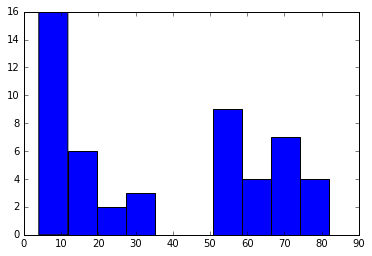

In [15]:
from matplotlib import pyplot as plt
from matplotlib import style
%matplotlib inline
plt.hist(rate)
plt.show

##### 15. Plot the Math distribution

<function matplotlib.pyplot.show>

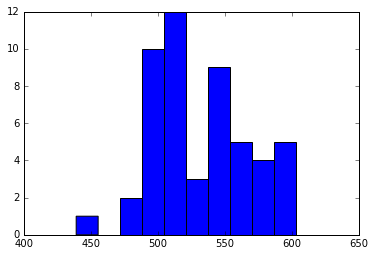

In [16]:
plt.hist(math)
plt.show

##### 16. Plot the Verbal distribution

<function matplotlib.pyplot.show>

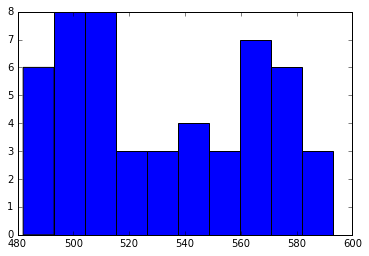

In [17]:
plt.hist(verbal)
plt.show

##### 17. What is the typical assumption for data distribution?

In [ ]:
"""The typical assumption of data distribution is that sampling the distribution of the mean will be normal.  
Or, in other words, that calculating the mean by one random sample, and then doing so an infinite amount of times, will
always result in a perfect bell curve."""

##### 18. Does that distribution hold true for our data?

In [91]:
print scipy.stats.mstats.normaltest(rate, axis = 0)
print scipy.stats.mstats.normaltest(verbal, axis = 0)
print scipy.stats.mstats.normaltest(math, axis = 0)

NormaltestResult(statistic=81.808181893074121, pvalue=1.720200282492163e-18)
NormaltestResult(statistic=21.872280910358018, pvalue=1.7803055551900955e-05)
NormaltestResult(statistic=0.53233528608047165, pvalue=0.76631065008500243)


##### 19. Plot some scatterplots. **BONUS**: Use a PyPlot `figure` to present multiple plots at once.

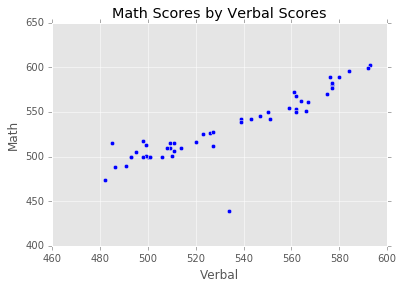

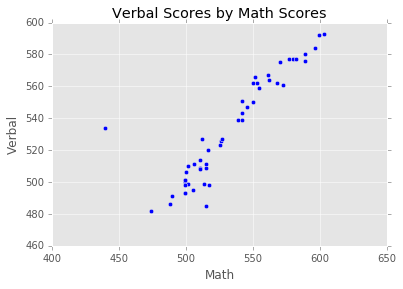

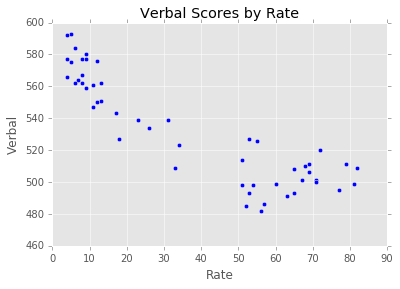

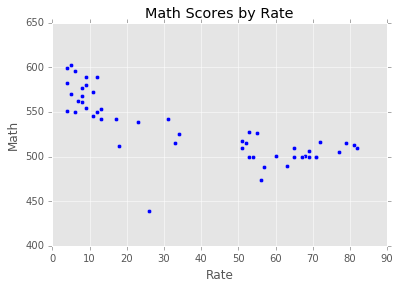

In [64]:
style.use('ggplot')

x = [verbal]
y = [math]
plt.scatter(x, y)#, align='center')

plt.title('Math Scores by Verbal Scores')
plt.ylabel('Math')
plt.xlabel('Verbal')

plt.show()

style.use('ggplot')

x = [math]
y = [verbal]
plt.scatter(x, y)#, align='center')

plt.title('Verbal Scores by Math Scores')
plt.ylabel('Verbal')
plt.xlabel('Math')

plt.show()

style.use('ggplot')

x = [rate]
y = [verbal]
plt.scatter(x, y)#, align='center')

plt.title('Verbal Scores by Rate')
plt.ylabel('Verbal')
plt.xlabel('Rate')

plt.show()

style.use('ggplot')

x = [rate]
y = [math]
plt.scatter(x, y)#, align='center')

plt.title('Math Scores by Rate')
plt.ylabel('Math')
plt.xlabel('Rate')

plt.show()

##### 20. Are there any interesting relationships to note?

In [66]:
"""One of the most notable relationships from the data I pulled is that as scores increase in one subject,
they also increase in the other subject.  So if a student has a high math score, they will also have a high verbal score
and vice versa.  Another interesting observation comes from the Math and Verbal scores by rate, which indicates that
the lower the rate of participation by a state, the higher the scores in both categories tended to be.""" 

##### 21. Create box plots for each variable. 

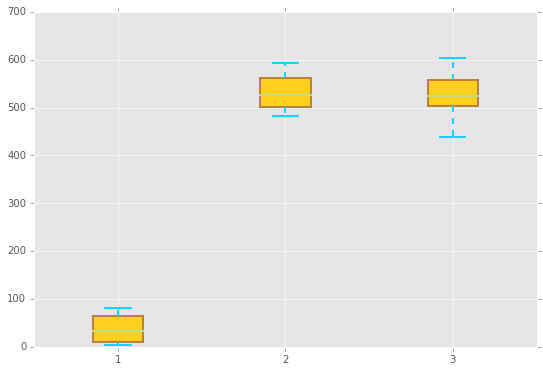

In [62]:
data_to_plot = [rate, verbal, math]
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(data_to_plot, patch_artist=True)

for box in bp['boxes']:
    # change outline color
    box.set( color='#BB7F3E', linewidth=2)
    # change fill color
    box.set( facecolor = '#FFCF1C' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#0DD7FF', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#0DD7FF', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

In [109]:
#I created a tableau document titled Bonus_Heat_Map.twb and placed it in the Solutions folder.